In [309]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib.ticker as ticker
import seaborn as sns
import re
import itertools
from skimpy import clean_columns
import pycountry_convert as pc
import pycountry

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns', None)

In [126]:
df=pd.read_csv('suicide.csv')

In [127]:
df

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.710,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.190,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.830,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.590,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.280,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.960,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.580,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.170,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.670,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


In [128]:
df1=df.copy()

In [129]:
df1

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.710,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.190,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.830,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.590,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.280,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.960,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.580,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.170,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.670,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


In [130]:
df1.sample(10)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
13070,Italy,2008,female,55-74 years,313,7058147,4.430,Italy2008,NaN,"2,390,729,163,615",41935,Silent
23582,Spain,1989,female,55-74 years,325,3919400,8.290,Spain1989,NaN,"413,630,538,018",11258,G.I. Generation
23717,Spain,2000,female,15-24 years,43,2846326,1.510,Spain2000,0.827,"595,402,616,547",15538,Generation X
7459,Denmark,1997,female,55-74 years,88,501000,17.560,Denmark1997,NaN,"173,537,588,008",35148,Silent
15913,Malta,1993,female,15-24 years,0,25500,0.000,Malta1993,NaN,"2,709,178,327",8022,Generation X
27352,Uruguay,1998,male,75+ years,56,61835,90.560,Uruguay1998,NaN,"25,385,928,198",8420,G.I. Generation
18745,Paraguay,2003,male,35-54 years,43,549755,7.820,Paraguay2003,NaN,"6,588,103,836",1339,Boomers
23964,Sri Lanka,1999,male,15-24 years,765,1805721,42.370,Sri Lanka1999,NaN,"15,656,327,860",920,Generation X
22965,Slovakia,2008,male,75+ years,27,92415,29.220,Slovakia2008,NaN,"100,324,627,215",19530,Silent
12143,Ireland,1992,male,35-54 years,82,416800,19.670,Ireland1992,NaN,"55,985,506,499",17051,Boomers


In [131]:
df1.shape

(27820, 12)

In [132]:
df1.drop('suicides_no',axis=1,inplace=True)

In [133]:
df1

,country,year,sex,age,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,312900,6.710,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,308000,5.190,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,289700,4.830,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,21800,4.590,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,274300,3.280,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,3620833,2.960,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,348465,2.580,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,2762158,2.170,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,2631600,1.670,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


In [134]:
df1.drop(df1.columns[7:9],axis=1,inplace=True)

In [11]:
df1.drop('population',axis=1,inplace=True)

In [12]:
df1.drop('country-year',axis=1,inplace=True)

In [242]:
df1.sample(10)

,country,year,sex,age,population,suicides_100k_pop,country_year,gdp_per_capita_$,generation,new_age
14944,Latvia,2007,female,25-34 years,148231,4.720,Latvia2007,14758,Generation X,25
15307,Luxembourg,1985,male,55-74 years,30200,46.360,Luxembourg1985,13743,G.I. Generation,55
3223,Belarus,1992,female,5-14 years,793700,0.500,Belarus1992,1780,Millenials,5
9513,Georgia,1996,female,25-34 years,355300,1.410,Georgia1996,718,Generation X,25
7049,Cyprus,2012,male,75+ years,20320,0.000,Cyprus2012,30752,Silent,75
2191,Azerbaijan,1991,male,5-14 years,771100,0.000,Azerbaijan1991,1398,Millenials,5
25517,Trinidad and Tobago,2002,male,35-54 years,170592,28.720,Trinidad and Tobago2002,7578,Boomers,35
13846,Kazakhstan,1999,male,75+ years,75400,72.940,Kazakhstan1999,1225,G.I. Generation,75
10079,Greece,1989,female,15-24 years,748500,0.940,Greece1989,8310,Generation X,15
6973,Cyprus,2006,female,15-24 years,58243,0.000,Cyprus2006,28600,Millenials,15


In [136]:
df1 = clean_columns(df1)
df1.columns.tolist()

3 column names have been cleaned

['country',
 'year',
 'sex',
 'age',
 'population',
 'suicides_100k_pop',
 'country_year',
 'gdp_per_capita_$',
 'generation']

In [178]:

df1['new_age'] = df1.age.str.extract(r'^(\d+)')

In [179]:
df1.sample(10)

,country,year,sex,age,population,suicides_100k_pop,country_year,gdp_per_capita_$,generation,new_age
4744,Bulgaria,2001,female,15-24 years,539883,4.630,Bulgaria2001,1854,Millenials,15
4701,Bulgaria,1998,female,75+ years,260000,50.380,Bulgaria1998,1852,G.I. Generation,75
27653,Uzbekistan,1998,male,55-74 years,832800,19.210,Uzbekistan1998,719,Silent,55
11117,Guyana,1992,male,15-24 years,77451,15.490,Guyana1992,561,Generation X,15
18878,Paraguay,2014,male,35-54 years,663506,9.040,Paraguay2014,5254,Generation X,35
26397,Ukraine,2015,female,75+ years,2261462,13.090,Ukraine2015,2256,Silent,75
3820,Belize,1986,male,35-54 years,14800,0.000,Belize1986,1552,Silent,35
13816,Kazakhstan,1996,female,15-24 years,1381300,11.440,Kazakhstan1996,1452,Generation X,15
22506,Singapore,1993,female,5-14 years,200800,0.500,Singapore1993,22835,Millenials,5
6919,Cyprus,1999,female,15-24 years,73855,0.000,Cyprus1999,12389,Generation X,15


In [37]:
df1.drop('age',axis=1,inplace=True)

In [38]:
df1

,country,year,sex,suicides_100k_pop,gdp_per_capita_$,generation,new_age
0,Albania,1987,male,6.710,796,Generation X,15
1,Albania,1987,male,5.190,796,Silent,35
2,Albania,1987,female,4.830,796,Generation X,15
3,Albania,1987,male,4.590,796,G.I. Generation,75
4,Albania,1987,male,3.280,796,Boomers,25
...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,2.960,2309,Generation X,35
27816,Uzbekistan,2014,female,2.580,2309,Silent,75
27817,Uzbekistan,2014,male,2.170,2309,Generation Z,5
27818,Uzbekistan,2014,female,1.670,2309,Generation Z,5


In [40]:
df1.rename(columns={'new_age': 'age'}, inplace=True)


In [41]:
df1

,country,year,sex,suicides_100k_pop,gdp_per_capita_$,generation,age
0,Albania,1987,male,6.710,796,Generation X,15
1,Albania,1987,male,5.190,796,Silent,35
2,Albania,1987,female,4.830,796,Generation X,15
3,Albania,1987,male,4.590,796,G.I. Generation,75
4,Albania,1987,male,3.280,796,Boomers,25
...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,2.960,2309,Generation X,35
27816,Uzbekistan,2014,female,2.580,2309,Silent,75
27817,Uzbekistan,2014,male,2.170,2309,Generation Z,5
27818,Uzbekistan,2014,female,1.670,2309,Generation Z,5


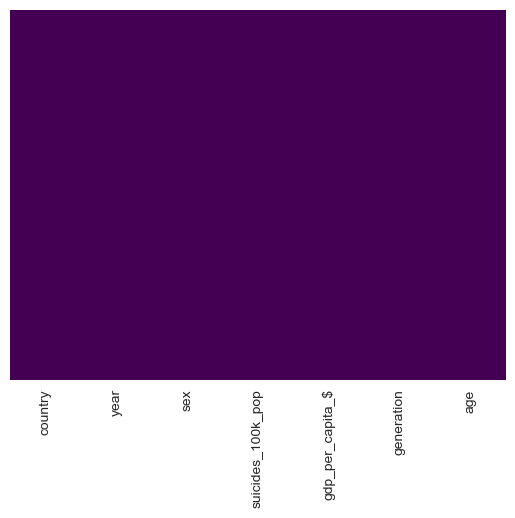

In [42]:
sns.heatmap(df1.isnull(), yticklabels=False, cbar=False, cmap='viridis');


In [137]:
df1

,country,year,sex,age,population,suicides_100k_pop,country_year,gdp_per_capita_$,generation
0,Albania,1987,male,15-24 years,312900,6.710,Albania1987,796,Generation X
1,Albania,1987,male,35-54 years,308000,5.190,Albania1987,796,Silent
2,Albania,1987,female,15-24 years,289700,4.830,Albania1987,796,Generation X
3,Albania,1987,male,75+ years,21800,4.590,Albania1987,796,G.I. Generation
4,Albania,1987,male,25-34 years,274300,3.280,Albania1987,796,Boomers
...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,3620833,2.960,Uzbekistan2014,2309,Generation X
27816,Uzbekistan,2014,female,75+ years,348465,2.580,Uzbekistan2014,2309,Silent
27817,Uzbekistan,2014,male,5-14 years,2762158,2.170,Uzbekistan2014,2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,2631600,1.670,Uzbekistan2014,2309,Generation Z


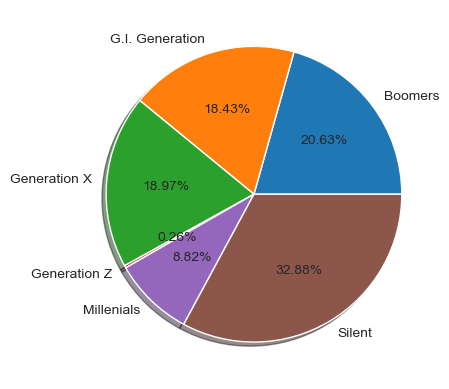

In [235]:
suicide_by_generation=df1.groupby('generation')['suicides_100k_pop'].sum()

plt.pie(x=suicide_by_generation, labels=suicide_by_generation.index, autopct='%.2f%%',shadow=True);

In [232]:
df1

,country,year,sex,age,population,suicides_100k_pop,country_year,gdp_per_capita_$,generation,new_age
0,Albania,1987,male,15-24 years,312900,6.710,Albania1987,796,Generation X,15
1,Albania,1987,male,35-54 years,308000,5.190,Albania1987,796,Silent,35
2,Albania,1987,female,15-24 years,289700,4.830,Albania1987,796,Generation X,15
3,Albania,1987,male,75+ years,21800,4.590,Albania1987,796,G.I. Generation,75
4,Albania,1987,male,25-34 years,274300,3.280,Albania1987,796,Boomers,25
...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,3620833,2.960,Uzbekistan2014,2309,Generation X,35
27816,Uzbekistan,2014,female,75+ years,348465,2.580,Uzbekistan2014,2309,Silent,75
27817,Uzbekistan,2014,male,5-14 years,2762158,2.170,Uzbekistan2014,2309,Generation Z,5
27818,Uzbekistan,2014,female,5-14 years,2631600,1.670,Uzbekistan2014,2309,Generation Z,5


In [261]:
df1.sample(10)

,country,year,sex,age,population,suicides_100k_pop,country_year,gdp_per_capita_$,generation,new_age
19704,Puerto Rico,1987,male,75+ years,50100,45.910,Puerto Rico1987,7533,G.I. Generation,75
1576,Australia,1997,female,25-34 years,1441724,7.560,Australia1997,25234,Generation X,25
9720,Germany,1990,male,5-14 years,4290400,0.510,Germany1990,23546,Generation X,5
13852,Kazakhstan,1999,female,35-54 years,1909900,10.370,Kazakhstan1999,1225,Boomers,35
963,Armenia,1990,male,25-34 years,307100,5.210,Armenia1990,756,Boomers,25
26306,Ukraine,2006,male,5-14 years,2377451,1.390,Ukraine2006,2418,Millenials,5
2711,Bahrain,2000,female,25-34 years,53263,1.880,Bahrain2000,15345,Generation X,25
4411,Brazil,2004,male,5-14 years,17787328,0.270,Brazil2004,3984,Millenials,5
6174,Costa Rica,1998,female,55-74 years,177615,0.560,Costa Rica1998,4046,Silent,55
3662,Belgium,2003,female,35-54 years,1509017,14.450,Belgium2003,32538,Boomers,35


In [320]:
custom_country_mapping = {
    'Republic of Korea': 'KR',  
    'Saint Vincent and Grenadines': 'VC',  




def country_to_continent(country_name):
    if country_name in custom_country_mapping:
        country_alpha2 = custom_country_mapping[country_name]
    else:
        try:
            country_alpha2 = pc.country_name_to_country_alpha2(country_name)
        except ValueError:
            return 'Unknown'

    country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
    country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    return country_continent_name


In [325]:
df1['continent'] = df1['country'].apply(country_to_continent)

In [326]:
df1.sample(10)

,country,year,sex,age,population,suicides_100k_pop,country_year,gdp_per_capita_$,generation,new_age,continent
23939,Sri Lanka,1997,male,35-54 years,2161948,68.970,Sri Lanka1997,900,Boomers,35,Asia
7280,Czech Republic,2005,male,15-24 years,695191,12.230,Czech Republic2005,13961,Millenials,15,Europe
12640,Israel,2003,female,25-34 years,503837,1.590,Israel2003,21133,Generation X,25,Asia
25581,Trinidad and Tobago,2007,female,25-34 years,106809,5.620,Trinidad and Tobago2007,17827,Generation X,25,North America
10307,Greece,2008,female,15-24 years,595248,0.000,Greece2008,33168,Millenials,15,Europe
22345,Seychelles,2011,female,35-54 years,13459,0.000,Seychelles2011,13204,Generation X,35,Africa
22984,Slovakia,2009,female,25-34 years,453130,1.320,Slovakia2009,17299,Generation X,25,Europe
18052,Norway,2001,male,15-24 years,276255,22.080,Norway2001,41281,Millenials,15,Europe
15593,Luxembourg,2008,male,5-14 years,30711,0.000,Luxembourg2008,121315,Generation Z,5,Europe
9093,France,1985,female,35-54 years,6652100,16.010,France1985,10765,Silent,35,Europe


- Global

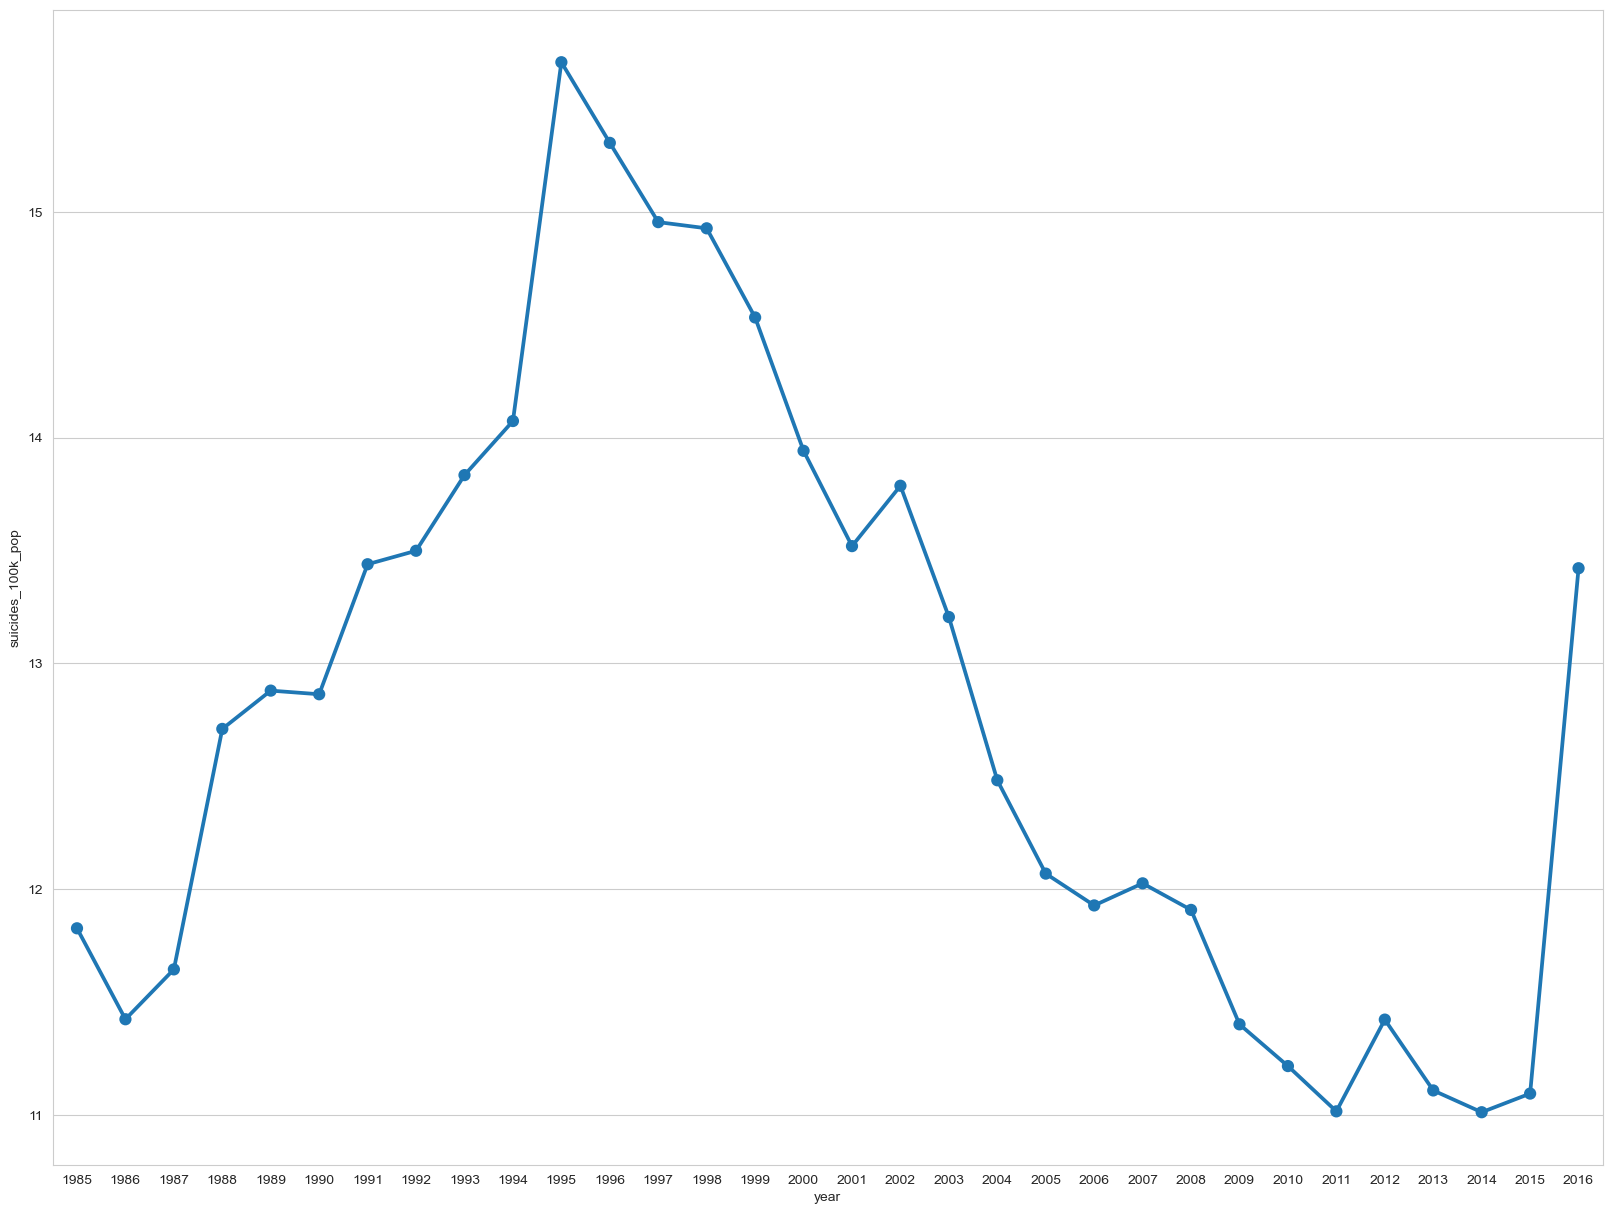

In [384]:

fig, ax = plt.subplots(nrows= 1, ncols = 1, figsize=(20,15))

marker = itertools.cycle(['o', '^', '*', '8', 's', 'p', 'd', 'v'])
markers = [next(marker) for i in df1["suicides_100k_pop"].unique()]

line = itertools.cycle(['-', '--', '-.', ':', 'solid', 'dashed', 'dashdot', 'dotted'])
lines = [next(line) for i in df1["suicides_100k_pop"].unique()]
sns.pointplot(data=df1,x = df1.year,y = df1.suicides_100k_pop,ci=None,markers=markers,linestyles=lines)
plt.show()

- By Continent

/Users/hamzaensar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


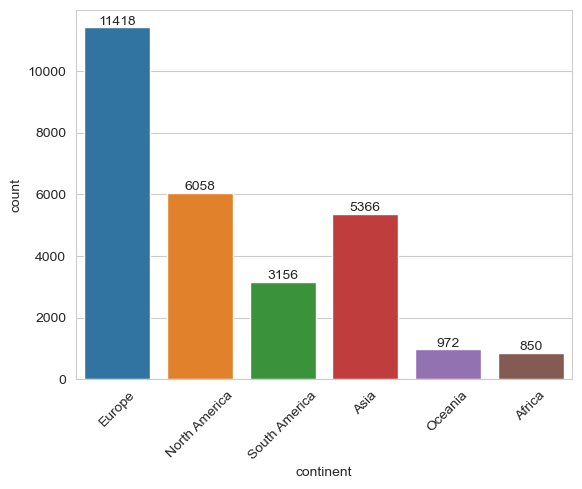

In [332]:
fig, ax = plt.subplots()

sns.countplot(df1.continent)

for container in ax.containers:
    ax.bar_label(container)

plt.xticks(rotation=45)
plt.show()

/Users/hamzaensar/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


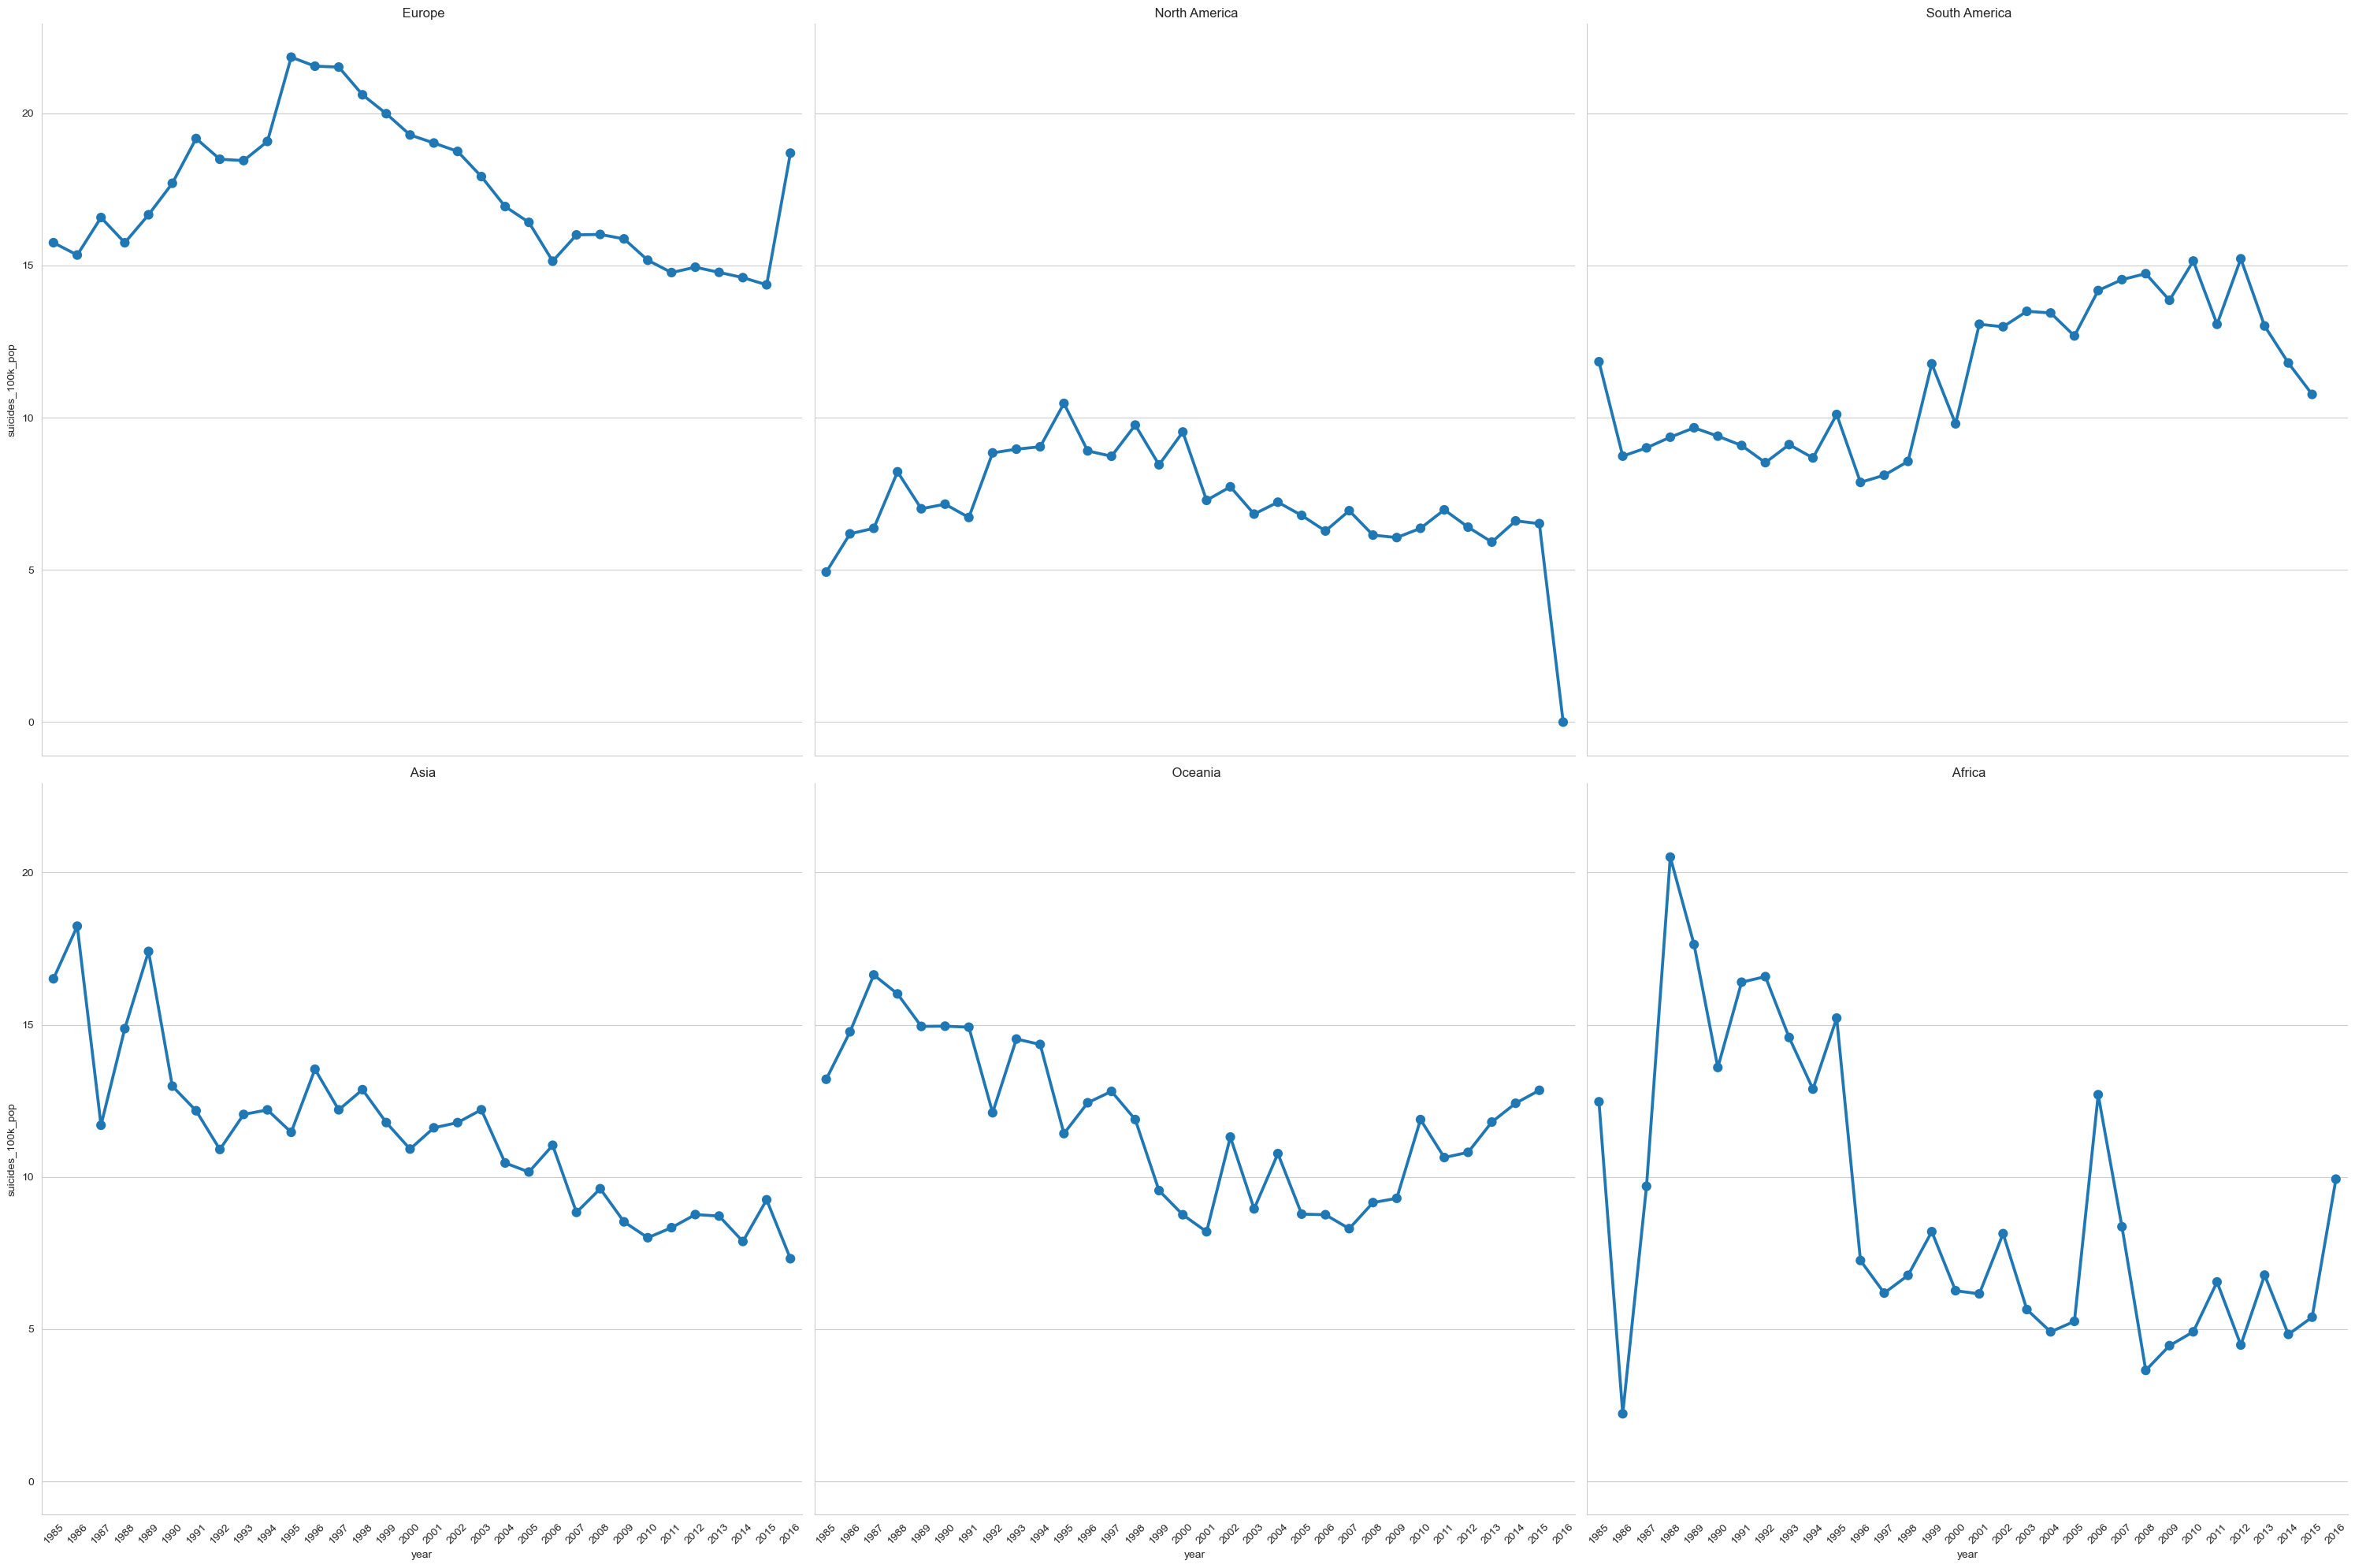

In [361]:

g = sns.FacetGrid(df1, col='continent', col_wrap=3,height=10)

g.map(sns.pointplot, 'year', 'suicides_100k_pop', ci=None)

g.set_xticklabels(rotation=45)

for ax in g.axes:
    ax.set_title(ax.get_title().replace("continent =", ""))
plt.tight_layout()
plt.show()

- By Gender

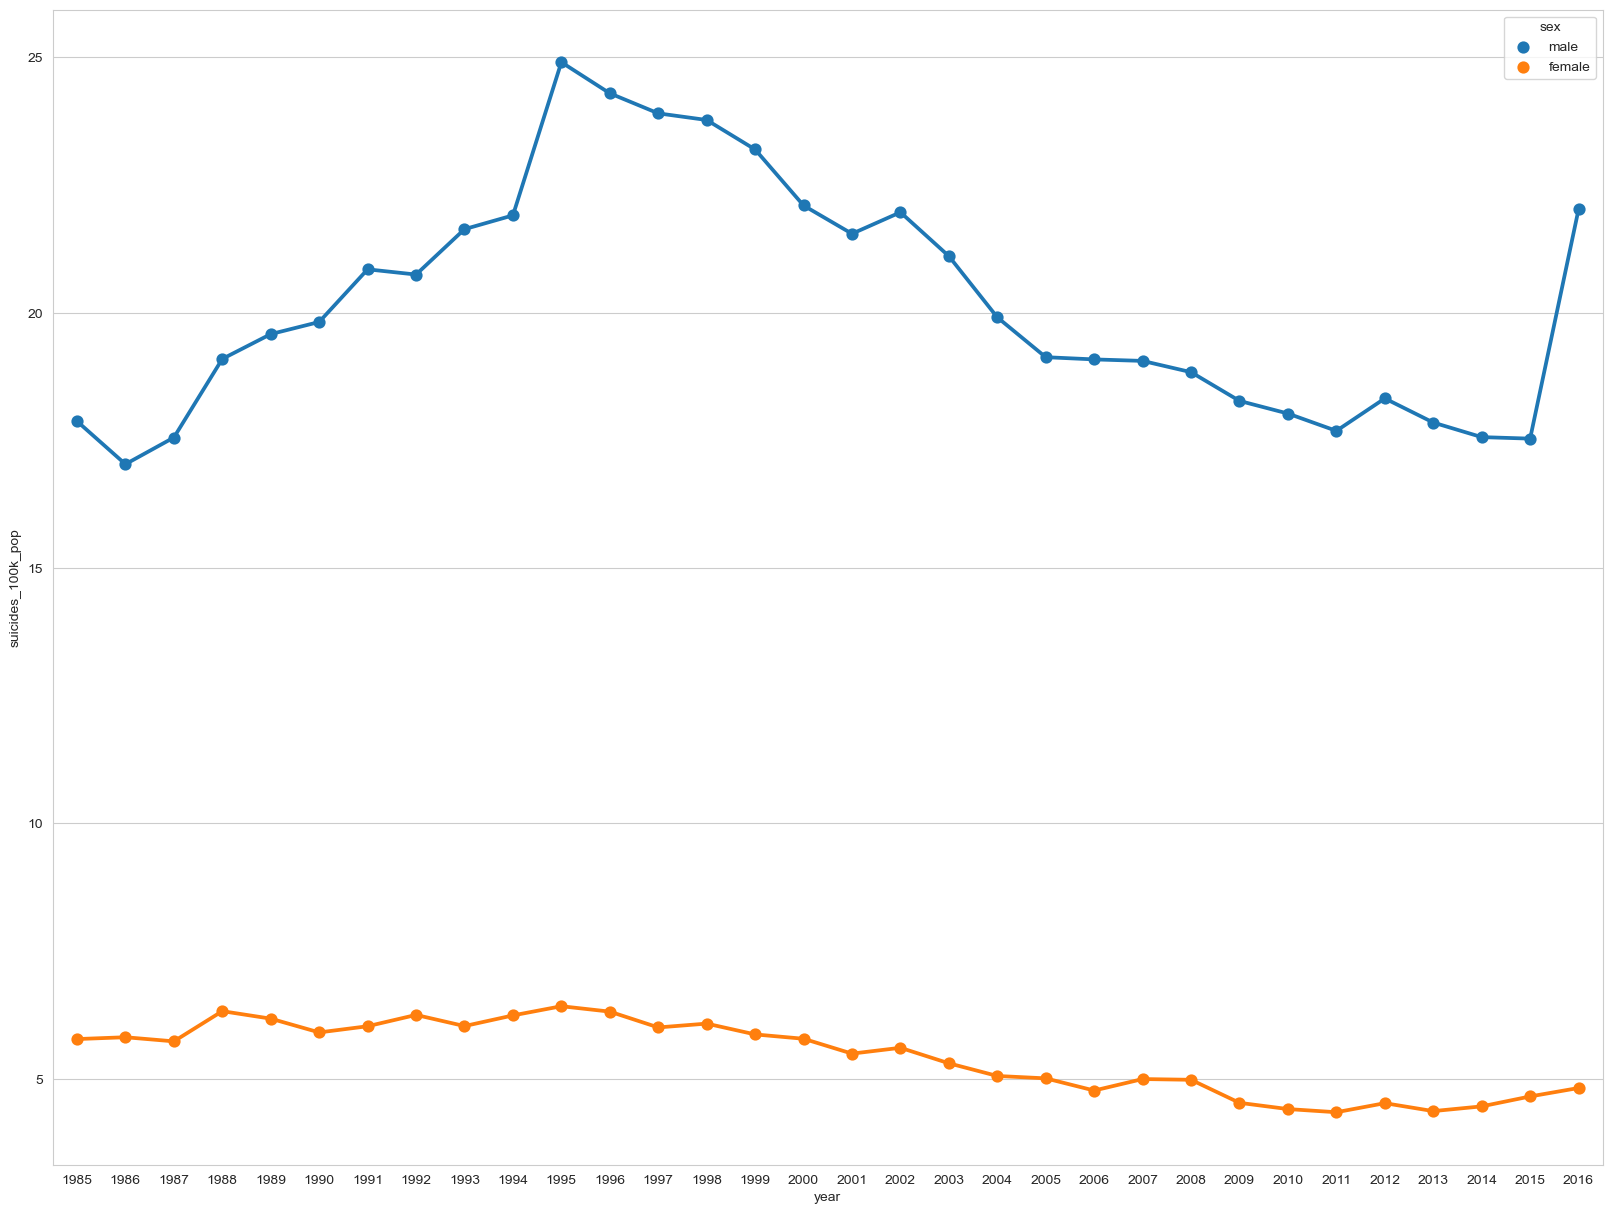

In [383]:
fig, ax = plt.subplots(nrows= 1, ncols = 1, figsize=(20,15))

marker = itertools.cycle(['o', '^', '*', '8', 's', 'p', 'd', 'v'])
markers = [next(marker) for i in df1["suicides_100k_pop"].unique()]

line = itertools.cycle(['-', '--', '-.', ':', 'solid', 'dashed', 'dashdot', 'dotted'])
lines = [next(line) for i in df1["suicides_100k_pop"].unique()]

sns.pointplot(data=df1,x = df1.year,y = df1.suicides_100k_pop,ci=None,hue='sex');





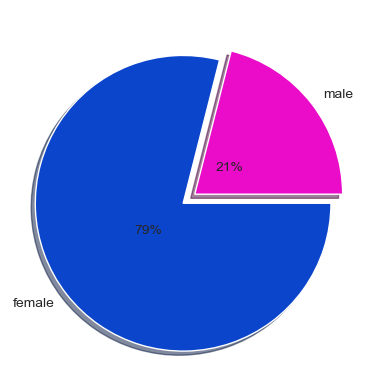

In [379]:
sex_counts = df1['sex'].value_counts()
suicides_by_gender = df1.groupby('sex')['suicides_100k_pop'].sum()


plt.pie(x=suicides_by_gender,labels=sex_counts.index,autopct='%.0f%%',
         explode = [0, 0.1],
       colors = ["#EA0CC8", "#0B45CB"],
       
       pctdistance=0.3,
       shadow = True);

- By Age 

<AxesSubplot:xlabel='age', ylabel='suicides_100k_pop'>

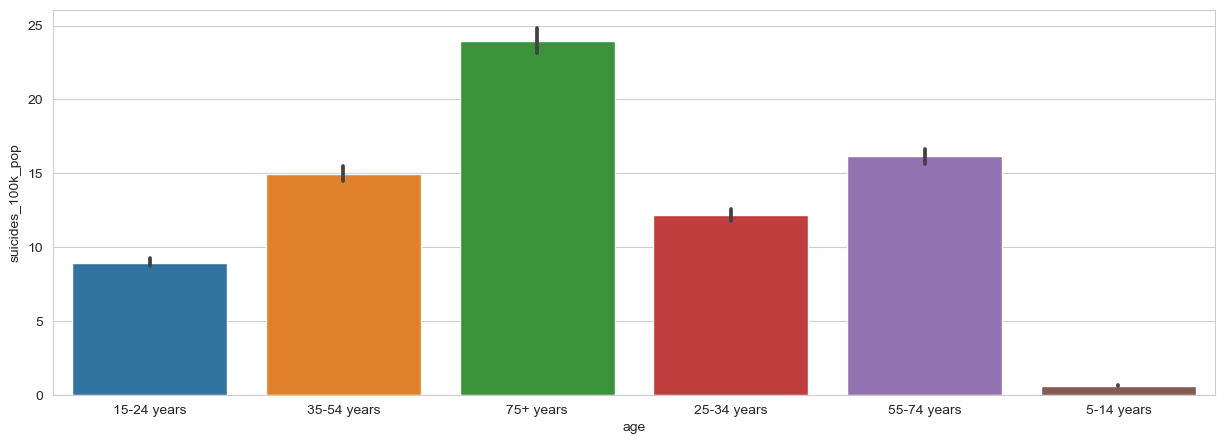

In [390]:


fig = plt.figure(figsize=(15,5))

sns.barplot(data=df1,x = df1.age, y = df1.suicides_100k_pop)


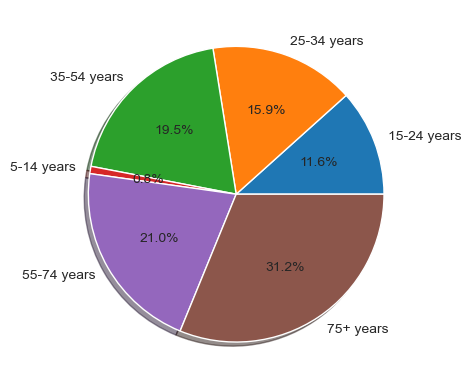

In [380]:
suicide_by_age=df1.groupby('age')['suicides_100k_pop'].sum()

plt.pie(x=suicides_by_age, labels=suicides_by_age.index, autopct='%.1f%%',shadow=True);

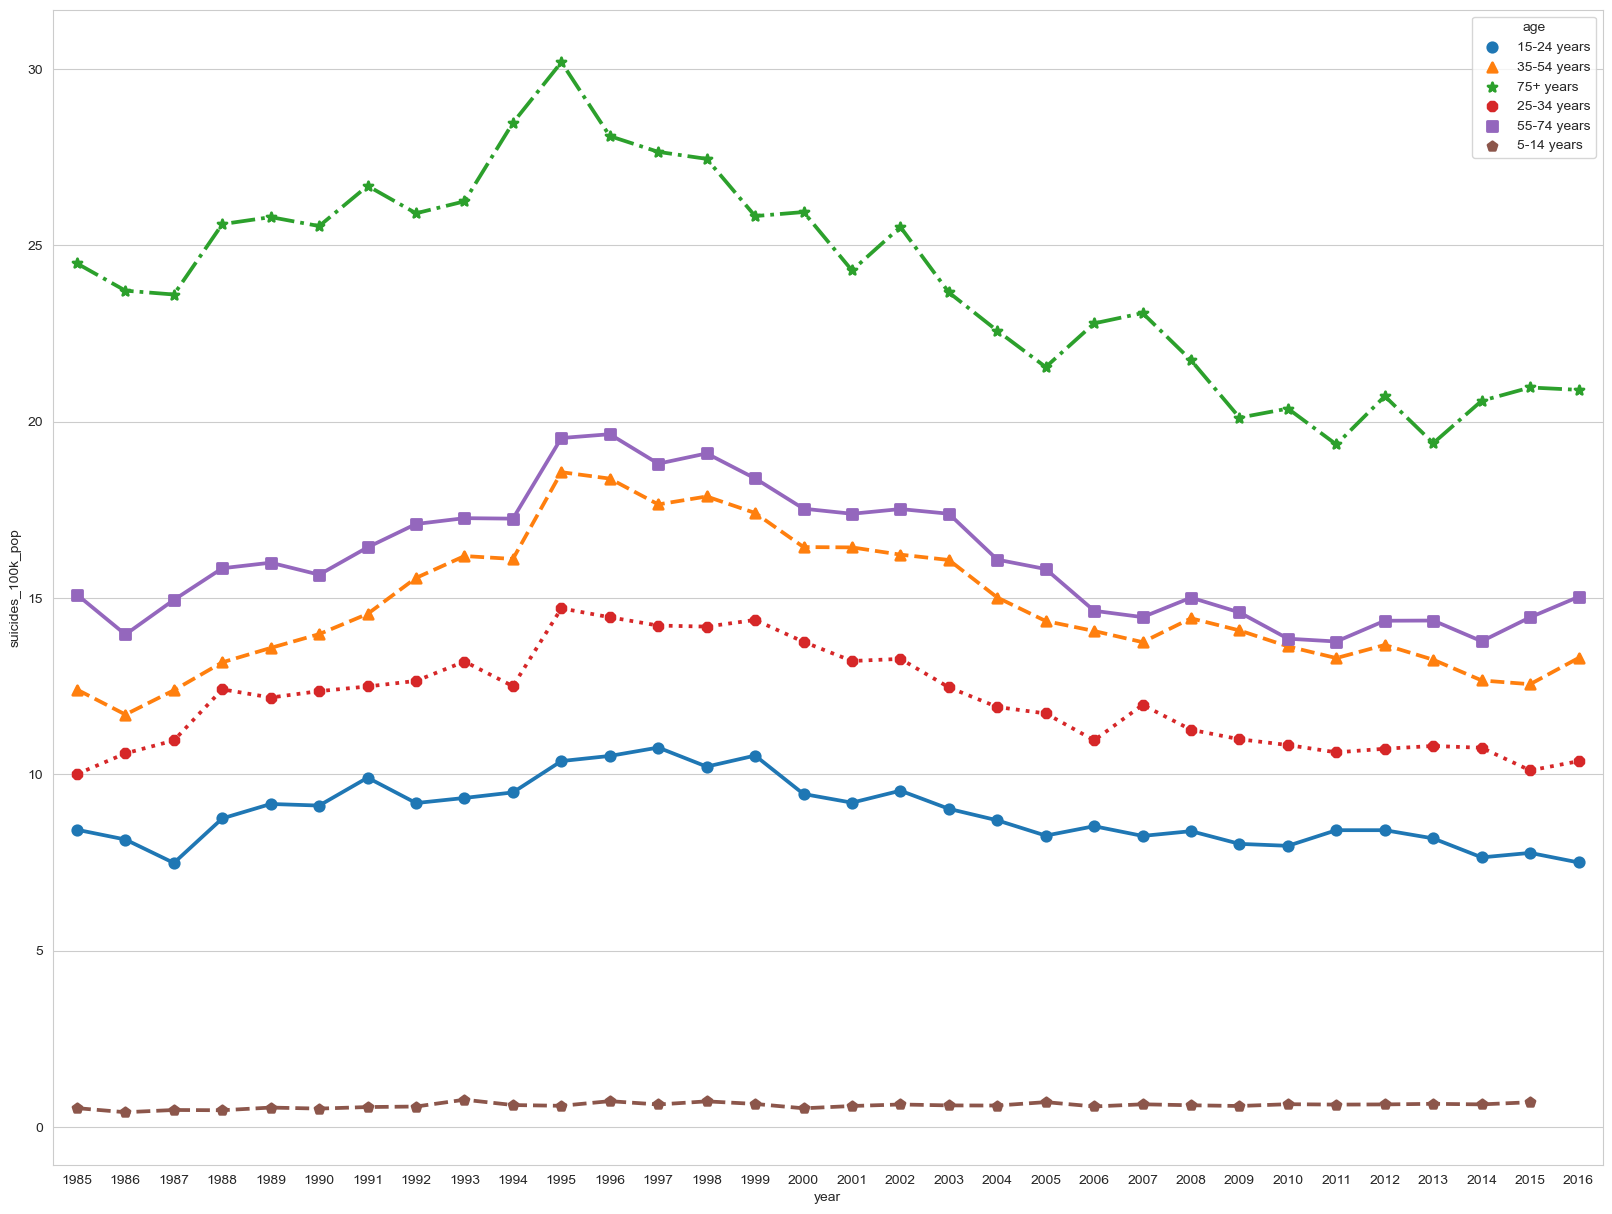

In [382]:
fig, ax = plt.subplots(nrows= 1, ncols = 1, figsize=(20,15))

marker = itertools.cycle(['o', '^', '*', '8', 's', 'p', 'd', 'v'])
markers = [next(marker) for i in df1["suicides_100k_pop"].unique()]

line = itertools.cycle(['-', '--', '-.', ':', 'solid', 'dashed', 'dashdot', 'dotted'])
lines = [next(line) for i in df1["suicides_100k_pop"].unique()]

sns.pointplot(data=df1,x = df1.year,y = df1.suicides_100k_pop,ci=None,hue='age',markers=markers,linestyles=lines)
plt.show()

- By Country